In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df

,img_id,cam_id,seq_id,frame_id,bbox_id,x_min,x_max,y_min,y_max,label_l1,label_l2,fao_mfa,train,val,test
0,da7c5ef0-db28-11ea-b693-9b3523cc10a5,60,13209,33,1,626,754,-1,88,Human,HUMAN,81,True,False,False
1,da7c5ef0-db28-11ea-b693-9b3523cc10a5,60,13209,33,3,544,710,15,203,Human,HUMAN,81,True,False,False
2,da7c5ef0-db28-11ea-b693-9b3523cc10a5,60,13209,33,4,629,735,210,562,Human,HUMAN,81,True,False,False
3,da7c5ef0-db28-11ea-b693-9b3523cc10a5,60,13209,33,5,615,883,550,907,Human,HUMAN,81,True,False,False
4,da7c5ef0-db28-11ea-b693-9b3523cc10a5,60,13209,33,6,885,962,826,875,Unknown,OTH,81,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549204,fcdecc18-5952-11ec-a87d-47788f674eed,93,15,28,126812,227,510,702,992,Yellowfin tuna,YFT,81,False,False,True
549205,fcdeef2c-5952-11ec-a8ae-cf526681fdda,93,15,77,128339,223,518,700,996,Yellowfin tuna,YFT,81,False,False,True
549206,fcdeef2c-5952-11ec-a8ae-cf526681fdda,93,15,77,128338,875,1127,668,1030,Yellowfin tuna,YFT,81,False,False,True
549207,fcdeef2c-5952-11ec-a8ae-cf526681fdda,93,15,77,128337,1069,1465,487,674,Yellowfin tuna,YFT,81,False,False,True


In [13]:
from PIL import Image, ImageDraw
image_path = 'img'
def plot_graun_true(name):
    bboxs= df[df['img_id'] == name][['x_min', 'y_min','x_max', 'y_max']].to_numpy()
    classes_name= df[df['img_id'] == name]['label_l1'].to_numpy()
    img_test = Image.open(f'{image_path}/{name}.jpg')
    img_test_draw = ImageDraw.Draw(img_test)
    for bbox,cl in zip(bboxs,classes_name):
        img_test_draw.rectangle(bbox, outline='red',width=10)
        img_test_draw.text(bbox[:2],cl,font_size=20,stroke_width=1)

    return img_test


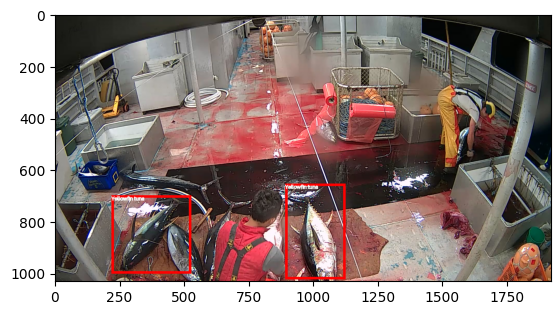

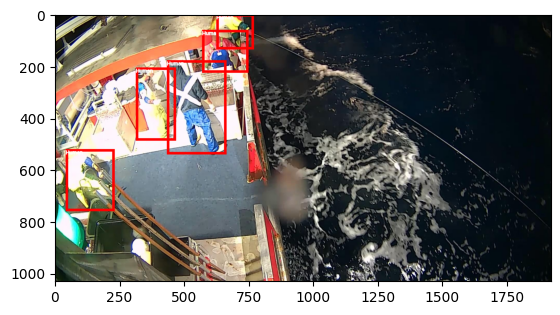

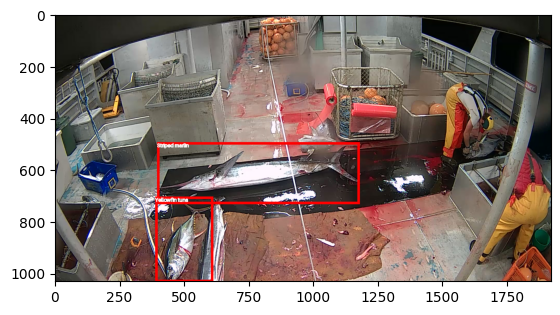

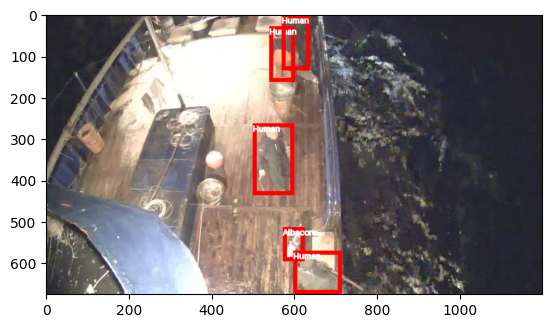

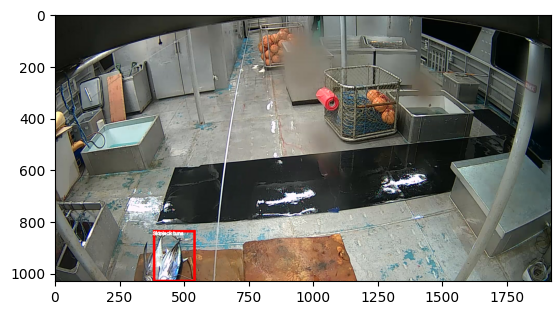

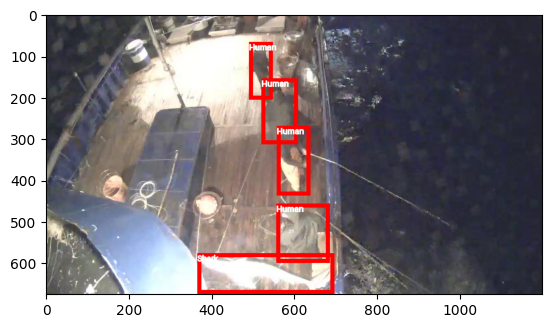

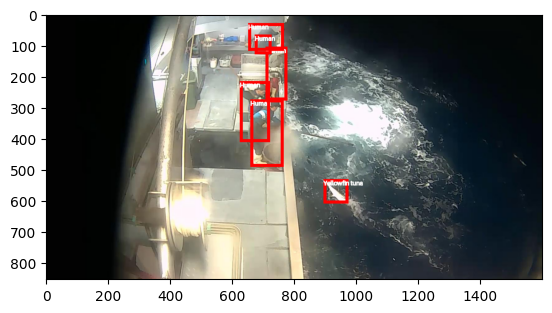

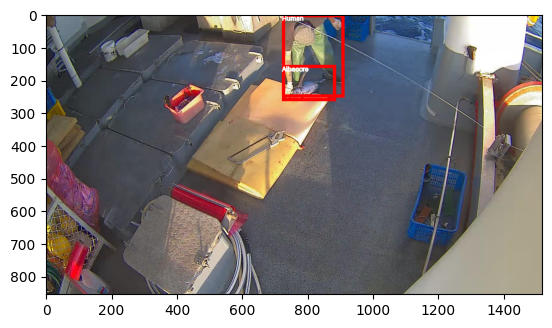

In [14]:
import matplotlib.pyplot as plt  
for  i in list(set(df['img_id']))[:10]:
    try: 
        plt.imshow(plot_graun_true(i))
        plt.show()
    except:
        pass

In [15]:
df['label_l1'].value_counts()

label_l1
Human                      281040
Yellowfin tuna             129193
Albacore                    81471
Skipjack tuna               22256
Bigeye tuna                  9700
Unknown                      6779
Mahi mahi                    4425
Shortbill spearfish          2193
No fish                      1965
Opah                         1681
Swordfish                    1664
Striped marlin               1196
Blue marlin                   889
Tuna                          835
Shark                         808
Oilfish                       778
Wahoo                         677
Escolar                       673
Great barracuda               182
Long snouted lancetfish       176
Indo Pacific sailfish         129
Sickle pomfret                 83
Black marlin                   83
Lancetfish                     81
Water                          74
Marlin                         57
Pomfret                        54
Pelagic stingray               51
Mola mola                       6
Roudi

In [17]:
from collections import defaultdict 

In [39]:
from tqdm import tqdm

In [40]:
path = 'img'

In [46]:
s_class = set(df['label_l1'])
s_class_data = defaultdict(lambda : defaultdict(list))
for i in s_class:
    for j in tqdm(df[df['label_l1'] == i].iloc):
        x,x1,y,y1 = j[5:9].tolist()
        label = j[9]
        name = j[0]
        xs, ys = Image.open(f'{path}/{name}.jpg').size 
        s_class_data[label][name].append(
            {'bbox':[x,x1,y,y1],
              'xs':xs,
               'ys':ys
            })


0it [00:00, ?it/s]/tmp/ipykernel_25739/79002261.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = j[9]
/tmp/ipykernel_25739/79002261.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = j[0]
778it [00:00, 8028.17it/s]
74it [00:00, 7712.80it/s]
2it [00:00, 2607.59it/s]
281040it [00:35, 7967.15it/s]
9700it [00:01, 6732.83it/s]
83it [00:00, 7779.55it/s]
677it [00:00, 7932.84it/s]
6it [00:00, 4315.87it/s]
1it [00:00, 2223.92it/s]
673it [00:00, 8221.61it/s]
182it [00:00, 7896.75it/s]
835it [00:00, 8097.71it/s]
808it [00:00, 7869.31it/s]
176it [00:00, 7933.94it/s]
83it [00:00, 7048.39it/s]
81it [00:00, 7743

In [113]:
avg_size_label_bbox = {}
from  statistics import median
median_size_label_bbox = defaultdict(list)
for i in s_class:
    s = 0
    c = 0
    for e in s_class_data[i].values():
        for elem in e:
            x,x1,y,y1 = elem['bbox']
            ys = elem['ys']
            xs = elem['xs']
            s+=(x1-x)*(y1-y)/ys/ys
            median_size_label_bbox[i].append((x1-x)*(y1-y)/ys/ys)
            c+=1
    avg_size_label_bbox[i]=s/c
median_size_label_bbox = {k:median(v) for k,v in median_size_label_bbox.items()}

In [114]:
avg_size_label_bbox

{'Oilfish': 0.01883740329624738,
 'Water': 0.04877040010632117,
 'Rainbow runner': 0.004706721536351165,
 'Human': 0.07329382831387526,
 'Bigeye tuna': 0.05572499961121335,
 'Black marlin': 0.08755380318531443,
 'Wahoo': 0.04251597325520158,
 'Mola mola': 0.08717274074074073,
 'Brama': 0.012404773788042495,
 'Escolar': 0.02595217261513118,
 'Great barracuda': 0.029625085596877387,
 'Tuna': 0.03576287211661495,
 'Shark': 0.04654094400169699,
 'Long snouted lancetfish': 0.02420475286278163,
 'Sickle pomfret': 0.021860145552774712,
 'Lancetfish': 0.028722527636073695,
 'Pomfret': 0.008982475348574078,
 'Mahi mahi': 0.043827797837383886,
 'Roudie scolar': 0.0694458912037037,
 'Unknown': 0.024853866790790886,
 'Yellowfin tuna': 0.06371972857590764,
 'Swordfish': 0.0898875616848906,
 'Indo Pacific sailfish': 0.07679987797875393,
 'Skipjack tuna': 0.012906446966187923,
 'Marlin': 0.05631876871673582,
 'Pelagic stingray': 0.012506343267254607,
 'Shortbill spearfish': 0.0705555826988958,
 'Stri

In [115]:
median_size_label_bbox

{'Oilfish': 0.015408212038806598,
 'Water': 0.037854687657606634,
 'Rainbow runner': 0.004706721536351165,
 'Human': 0.052736,
 'Bigeye tuna': 0.04296696177093598,
 'Black marlin': 0.06916213991769547,
 'Wahoo': 0.029201388888888888,
 'Mola mola': 0.08141333333333334,
 'Brama': 0.012404773788042495,
 'Escolar': 0.020773333333333335,
 'Great barracuda': 0.02040895061728395,
 'Tuna': 0.019712,
 'Shark': 0.02176,
 'Long snouted lancetfish': 0.012224965706447186,
 'Sickle pomfret': 0.020943287037037038,
 'Lancetfish': 0.02840888888888889,
 'Pomfret': 0.008605333333333333,
 'Mahi mahi': 0.024913777777777778,
 'Roudie scolar': 0.06981963734567902,
 'Unknown': 0.016689610539190144,
 'Yellowfin tuna': 0.061439999999999995,
 'Swordfish': 0.058913148039924174,
 'Indo Pacific sailfish': 0.07168395061728394,
 'Skipjack tuna': 0.010933333333333333,
 'Marlin': 0.018365779284766567,
 'Pelagic stingray': 0.00871111111111111,
 'Shortbill spearfish': 0.06822886228673768,
 'Striped marlin': 0.12642548725

In [51]:
max(avg_size_label_bbox.values())

1.773313707239491

In [52]:
avg_size_label_bbox.pop('No fish')
max(avg_size_label_bbox.values())

0.13878211817806616

In [100]:
count_size_label_bbox = {}
max_size_label_bbox ={}

for i in s_class:
    s = []
    max_=0
    len_ =[] 
    for k,e in s_class_data[i].items():
        max_ = max(max_,len(e))

        for elem in e:
            s.append(len(elem))
        len_.append(len(k))
    count_size_label_bbox[i]=sum(s)/sum(len_)
    max_size_label_bbox[i] =max_


In [101]:
count_size_label_bbox

{'Oilfish': 0.23321342925659472,
 'Water': 0.09946236559139784,
 'Rainbow runner': 0.08333333333333333,
 'Human': 0.2841095192459331,
 'Bigeye tuna': 0.10285447682063027,
 'Black marlin': 0.08539094650205761,
 'Wahoo': 0.08382862803368003,
 'Mola mola': 0.08333333333333333,
 'Brama': 0.08333333333333333,
 'Escolar': 0.08888008452192288,
 'Great barracuda': 0.08333333333333333,
 'Tuna': 0.0936518618214446,
 'Shark': 0.08977777777777778,
 'Long snouted lancetfish': 0.08333333333333333,
 'Sickle pomfret': 0.08333333333333333,
 'Lancetfish': 0.08881578947368421,
 'Pomfret': 0.10714285714285714,
 'Mahi mahi': 0.10175220750551876,
 'Roudie scolar': 0.08333333333333333,
 'Unknown': 0.1346642828764402,
 'Yellowfin tuna': 0.17333059638615642,
 'Swordfish': 0.08809826344769166,
 'Indo Pacific sailfish': 0.08333333333333333,
 'Skipjack tuna': 0.2565237436606731,
 'Marlin': 0.08333333333333333,
 'Pelagic stingray': 0.08333333333333333,
 'Shortbill spearfish': 0.11407615480649189,
 'Striped marlin'

In [102]:
max(count_size_label_bbox.items(),key=lambda x: x[1])

('Human', 0.2841095192459331)

In [103]:
min(count_size_label_bbox.items(),key=lambda x: x[1])

('Rainbow runner', 0.08333333333333333)

In [104]:
max_size_label_bbox

{'Oilfish': 8,
 'Water': 2,
 'Rainbow runner': 1,
 'Human': 13,
 'Bigeye tuna': 4,
 'Black marlin': 2,
 'Wahoo': 2,
 'Mola mola': 1,
 'Brama': 1,
 'Escolar': 2,
 'Great barracuda': 1,
 'Tuna': 2,
 'Shark': 2,
 'Long snouted lancetfish': 1,
 'Sickle pomfret': 1,
 'Lancetfish': 2,
 'Pomfret': 3,
 'Mahi mahi': 5,
 'Roudie scolar': 1,
 'Unknown': 19,
 'Yellowfin tuna': 16,
 'Swordfish': 3,
 'Indo Pacific sailfish': 1,
 'Skipjack tuna': 14,
 'Marlin': 1,
 'Pelagic stingray': 1,
 'Shortbill spearfish': 2,
 'Striped marlin': 2,
 'Blue marlin': 2,
 'Snake mackerel': 1,
 'Opah': 3,
 'Thresher shark': 1,
 'No fish': 1,
 'Albacore': 15}